In [ ]:
from datascience import *
import matplotlib
from path_data_variable import *
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
# Data on heights of parents and their adult children
original = Table.read_table(path_data + 'family_heights.csv')
heights = Table().with_columns(
    'MidParent', original.column('midparentHeight'),
    'Child', original.column('childHeight')
    )

In [3]:
heights

MidParent | Child
75.43     | 73.2
75.43     | 69.2
75.43     | 69
75.43     | 69
73.66     | 73.5
73.66     | 72.5
73.66     | 65.5
73.66     | 65.5
72.06     | 71
72.06     | 68
... (924 rows omitted)

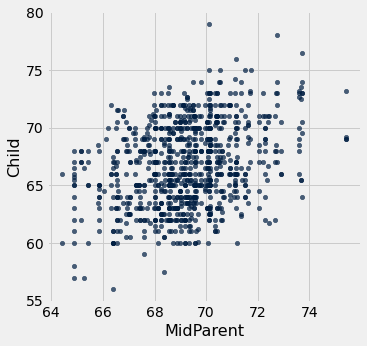

In [4]:
heights.scatter('MidParent')

In [5]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()                       

In [6]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

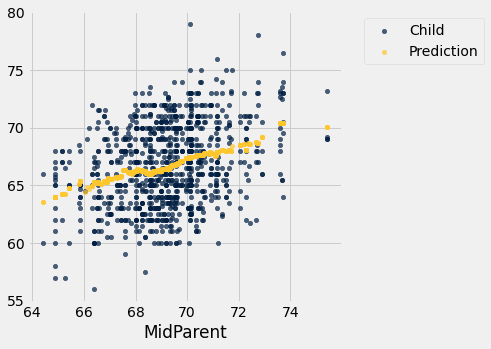

In [7]:
# Draw the original scatter plot along with the predicted values

heights_with_predictions.scatter('MidParent')